In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from google.colab import drive
drive.mount('/content/drive')
plt.rc('figure', figsize=(10, 5))

Mounted at /content/drive


In [4]:
gdp= pd.read_excel('/content/drive/MyDrive/CP project/Project/Raw Datasets/GDP_real.xlsx', sheet_name="Quarterly", names=["Observation Date","GDP"] ) #billions of dollars
gdp.set_index([gdp.columns[0]],inplace=True)
gdp.index=(pd.to_datetime(gdp.index))
gdp=gdp.resample("Y").sum()
gdp


<ipython-input-4-65e89715dbb2>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  gdp=gdp.resample("Y").sum()


,GDP
Observation Date,
1947-12-31,8738.457
1948-12-31,9098.506
1949-12-31,9047.711
1950-12-31,9834.127
1951-12-31,10625.280
...,...
2020-12-31,81070.339
2021-12-31,85979.193
2022-12-31,88139.315


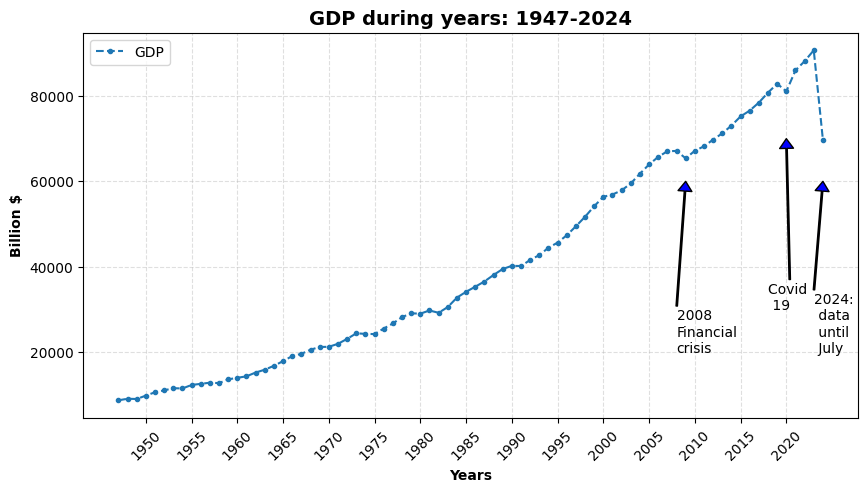

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gdp,"--.",label="GDP")
ax.set_title('GDP during years: 1947-2024', fontsize=14, fontweight="bold")
ax.set_xlabel('Years', fontsize=10, fontweight="bold")
ax.set_ylabel('Billion $', fontsize=10, fontweight="bold")
ax.legend(loc="upper left")
ax.grid(True, linestyle="--", alpha=0.4)
crisis_date=[
 (datetime(2009,12,31), "2008 \nFinancial\ncrisis", 0, datetime(2008,12,31)),
 (datetime(2020,12,31), "Covid \n 19", 10000, datetime(2018,12,31)),
 (datetime(2024,12,31), "2024: \n data \n until \n July", 0, datetime(2023,12,31))]
for date,label,disp,date_text in crisis_date:
  ax.annotate(label, xy=(date, 60000 + disp), #endpoint
              xytext=(date_text, 20000+disp),
              arrowprops=dict(facecolor='blue', headwidth=10, width=1,
                              headlength=7))
x_ticks = gdp.index[gdp.index.year % 5== 0]  #ticks
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks.year, rotation=45)
plt.show()

Text(0, 0.5, 'Billion $')

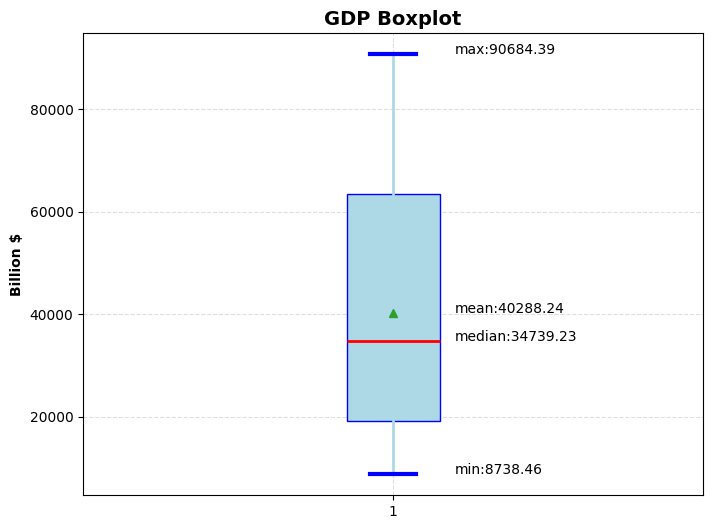

In [6]:
fig,ax =plt.subplots(figsize=(8,6))
ax.boxplot(gdp,vert=True, showmeans=True,patch_artist=True,
           medianprops=dict(color="red", linewidth=2),#median
           boxprops=dict(facecolor="lightblue", color="blue"),
           whiskerprops=dict(color="lightblue", linewidth=2),
           capprops=dict(color="blue",linewidth=3),
           )

min_val=gdp["GDP"].min()
max_val=gdp["GDP"].max()
mean=gdp["GDP"].mean()
median=gdp["GDP"].median()
ax.grid(True, linestyle="--", alpha=0.4)
ax.annotate(f"min:{min_val:.2f}",
            xy=(1,min_val),
            xytext=(1.1,min_val))

ax.annotate(f"mean:{mean:.2f}",
            xy=(1,mean),
            xytext=(1.1,mean))

ax.annotate(f"median:{median:.2f}",
            xy=(1,median),
            xytext=(1.1,median))

ax.annotate(f"max:{max_val:.2f}",
            xy=(1,max_val),
            xytext=(1.1,max_val))
ax.set_title("GDP Boxplot", fontsize=14, fontweight="bold")
ax.set_ylabel("Billion $",fontsize=10, fontweight="bold")


In [8]:
#prepare election dataset for merging with gdp --> data from 1948 until 2024, skip 1974(NA value)

election_data = pd.read_csv('/content/drive/MyDrive/CP project/Project/Cleaned Datasets/Election Dataset Cleaned.csv', skiprows=[1,2,3,4,25], index_col=["Year"])
election_data
gdp_for_election=gdp.copy().drop("1947-12-31")
gdp_for_election
elections_years=list(range(1948,2025,4))
gdp_for_elections = []
for year in elections_years:
  gdp_period=gdp_for_election[(gdp_for_election.index.year >=(year-4)) & (gdp_for_election.index.year <year) ]
  sum_gdp= gdp_period["GDP"].sum()
  gdp_for_elections.append({"election year": year, "previous 4 year gdp": sum_gdp})
gdp_election_df= pd.DataFrame(gdp_for_elections)
gdp_election_df


,election year,previous 4 year gdp
0,1948,0.000
1,1952,38605.624
2,1956,46479.793
3,1960,51869.870
4,1964,59506.415
5,1968,73450.510
6,1972,85041.382
7,1976,96082.627
8,1980,109595.806
9,1984,118593.524


In [9]:
#merge election and gdp
election_gdp=pd.merge(gdp_election_df, election_data, left_on="election year", right_index=True, how="inner")
election_gdp

,election year,previous 4 year gdp,Voting-age Population (VAP),Turnout,VAP Turnout,President,President's Party,Mandate Years,Democratic,Libertarian,Other,Republican
0,1948,0.000,95573000,48833680,51.1,Harry S. Truman,Democratic,1945/1953,NaN,NaN,NaN,NaN
1,1952,38605.624,99929000,61551919,61.6,Dwight D. Eisenhower,Republican,1953/1961,NaN,NaN,NaN,NaN
2,1956,46479.793,104515000,62027040,59.3,Dwight D. Eisenhower,Republican,1953/1961,NaN,NaN,NaN,NaN
3,1960,51869.870,109672000,68836385,62.8,John F. Kennedy,Democratic,1961/1963,NaN,NaN,NaN,NaN
4,1964,59506.415,114090000,70097935,61.4,Lyndon B. Johnson,Democratic,1963/1969,NaN,NaN,NaN,NaN
5,1968,73450.510,120285000,73026831,60.7,Richard Nixon,Republican,1969/1974,NaN,NaN,NaN,NaN
6,1972,85041.382,140777000,77625152,55.1,Richard Nixon,Republican,1969/1974,NaN,NaN,NaN,NaN
7,1976,96082.627,152308000,81603346,53.6,Jimmy Carter,Democratic,1977/1981,40680446.0,95626.0,1954379.0,38870893.0
8,1980,109595.806,163945000,86496851,52.8,Ronald Reagan,Republican,1981/1989,35480948.0,867401.0,6505863.0,43642639.0
9,1984,118593.524,173995000,92654861,53.3,Ronald Reagan,Republican,1981/1989,37449813.0,227204.0,811015.0,54166829.0


In [10]:
party_color_map = {
    'Republican': 'red',
    'Democratic': 'blue',
    'Libertarian': 'green',
    'Other': 'grey'
}

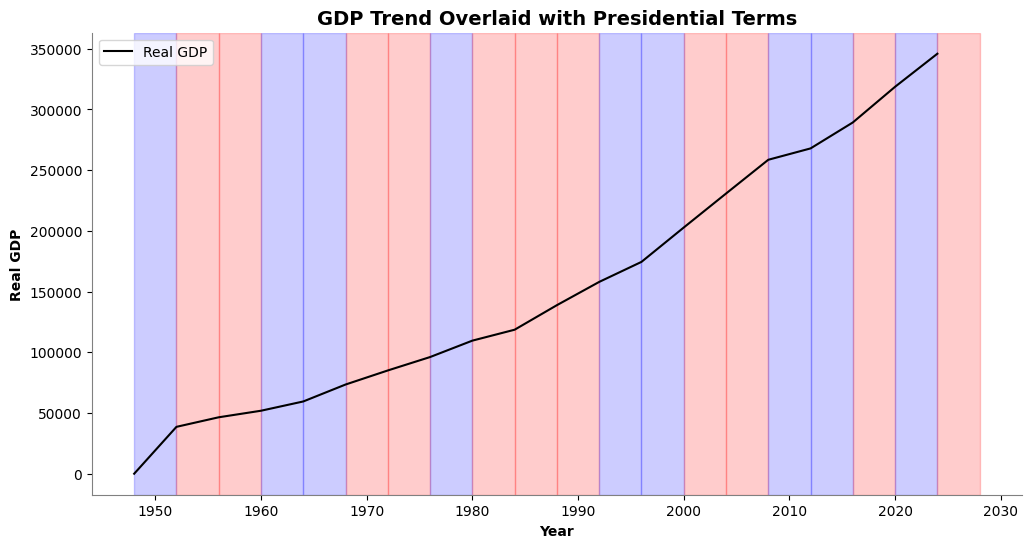

In [11]:
plt.figure(figsize=(12, 6))
ax=sns.lineplot(data=election_gdp, x='election year', y='previous 4 year gdp', color='black',label='Real GDP')
for i, row in election_gdp.iterrows():
    color = 'blue' if row["President's Party"] == 'Democratic' else 'red'
    plt.axvspan(row['election year'], row['election year']+4, color=color, alpha=0.2)

ax.set_title("GDP Trend Overlaid with Presidential Terms", fontsize=14, fontweight="bold")
ax.set_xlabel("Year", fontsize=10, fontweight="bold")
ax.set_ylabel("Real GDP", fontsize=10, fontweight="bold")
ax.set_xticks=elections_years
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("gray")
ax.spines["bottom"].set_color("gray")

In [12]:
#average gdp and political party:

party_incharge=pd.DataFrame(election_gdp, columns=["election year","previous 4 year gdp","President's Party"])
party_in_charge_s=pd.Series(party_incharge["President's Party"]).shift(1)
party_incharge["Party in charge"]=party_in_charge_s
party_incharge

,election year,previous 4 year gdp,President's Party,Party in charge
0,1948,0.000,Democratic,None
1,1952,38605.624,Republican,Democratic
2,1956,46479.793,Republican,Republican
3,1960,51869.870,Democratic,Republican
4,1964,59506.415,Democratic,Democratic
5,1968,73450.510,Republican,Democratic
6,1972,85041.382,Republican,Republican
7,1976,96082.627,Democratic,Republican
8,1980,109595.806,Republican,Democratic
9,1984,118593.524,Republican,Republican


Text(0, 0.5, 'Average GDP')

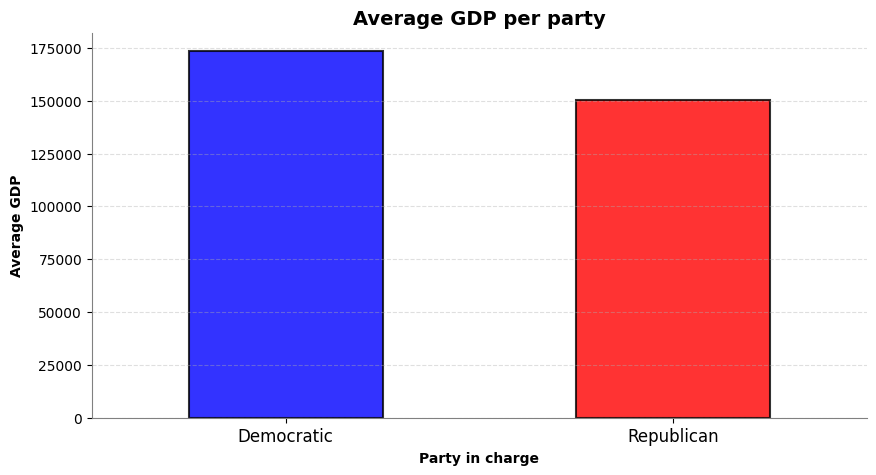

In [13]:
gdp_party=party_incharge.groupby("Party in charge")["previous 4 year gdp"].mean()
gdp_party.name="Average GDP"
gdp_party
ax=gdp_party.plot.bar(color=["blue", "red"], edgecolor="black",linewidth=1.5,  # Spessore del bordo
    alpha=0.8)

ax.yaxis.grid(True, linestyle="--", alpha=0.4)
ax.spines["top"].set_visible(False) #set to not see the lines
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("gray")
ax.spines["bottom"].set_color("gray")
ax.tick_params(axis="x", labelsize=12, rotation=0) #orizontal text

ax.set_title("Average GDP per party", fontsize=14, fontweight="bold")
ax.set_xlabel("Party in charge", fontsize=10, fontweight="bold",)
ax.set_ylabel("Average GDP", fontsize=10, fontweight="bold")

During democratic party mandate real GPD is higher   



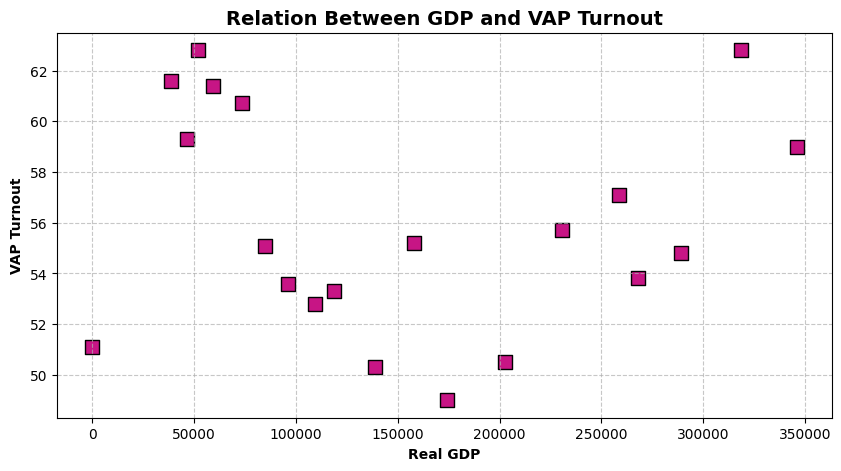

In [14]:
ax=plt.scatter(election_gdp["previous 4 year gdp"],election_gdp["VAP Turnout"], marker="s",color="mediumvioletred",edgecolor="black", s=100)
plt.xlabel("Real GDP", fontsize=10, fontweight="bold")
plt.ylabel("VAP Turnout", fontsize=10, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Relation Between GDP and VAP Turnout", fontsize=14, fontweight="bold")
plt.show()

there is no linear relationship between gdp and vap turnout, for lower gdp values the turnout is between 60%-65%, for higher GDP values VAP turnout is between 56% -62%. In order to explain  the model we need to add more variables